In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

### 1. Load DataSets

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### 2. Cancer Data Analysis

In [3]:
X = cancer.feature_names
y = cancer.target_names
print(X)
print(y)
cancer.data.shape

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


(569, 30)

In [4]:
# dir(cancer)
# cancer.keys()

np.bincount(cancer.target) #array([target[0], target[1]]) : target[0] :악성, target[1] : 양성

cancer.target[cancer.target==0].shape

(212,)

In [5]:
print("Sample Coint per class : \n[]".format({n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample Coint per class : 
[]


In [6]:
for i, name in enumerate(cancer.feature_names):
    print(i, name) #2자리로 출력

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


### 3. Model Generator and Train

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
dTree

DecisionTreeClassifier()

In [ ]:
### 4.Predict

In [8]:
pred = dTree.predict(X_test)
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1])

In [ ]:
### 5. Model Evaluate

In [9]:
score = accuracy_score(pred, y_test, normalize=True) #True 가 Default, 정확히 예측한 확률값
score = accuracy_score(pred, y_test, normalize=False) # 정확히 예측한 데이터의 건수
score

104

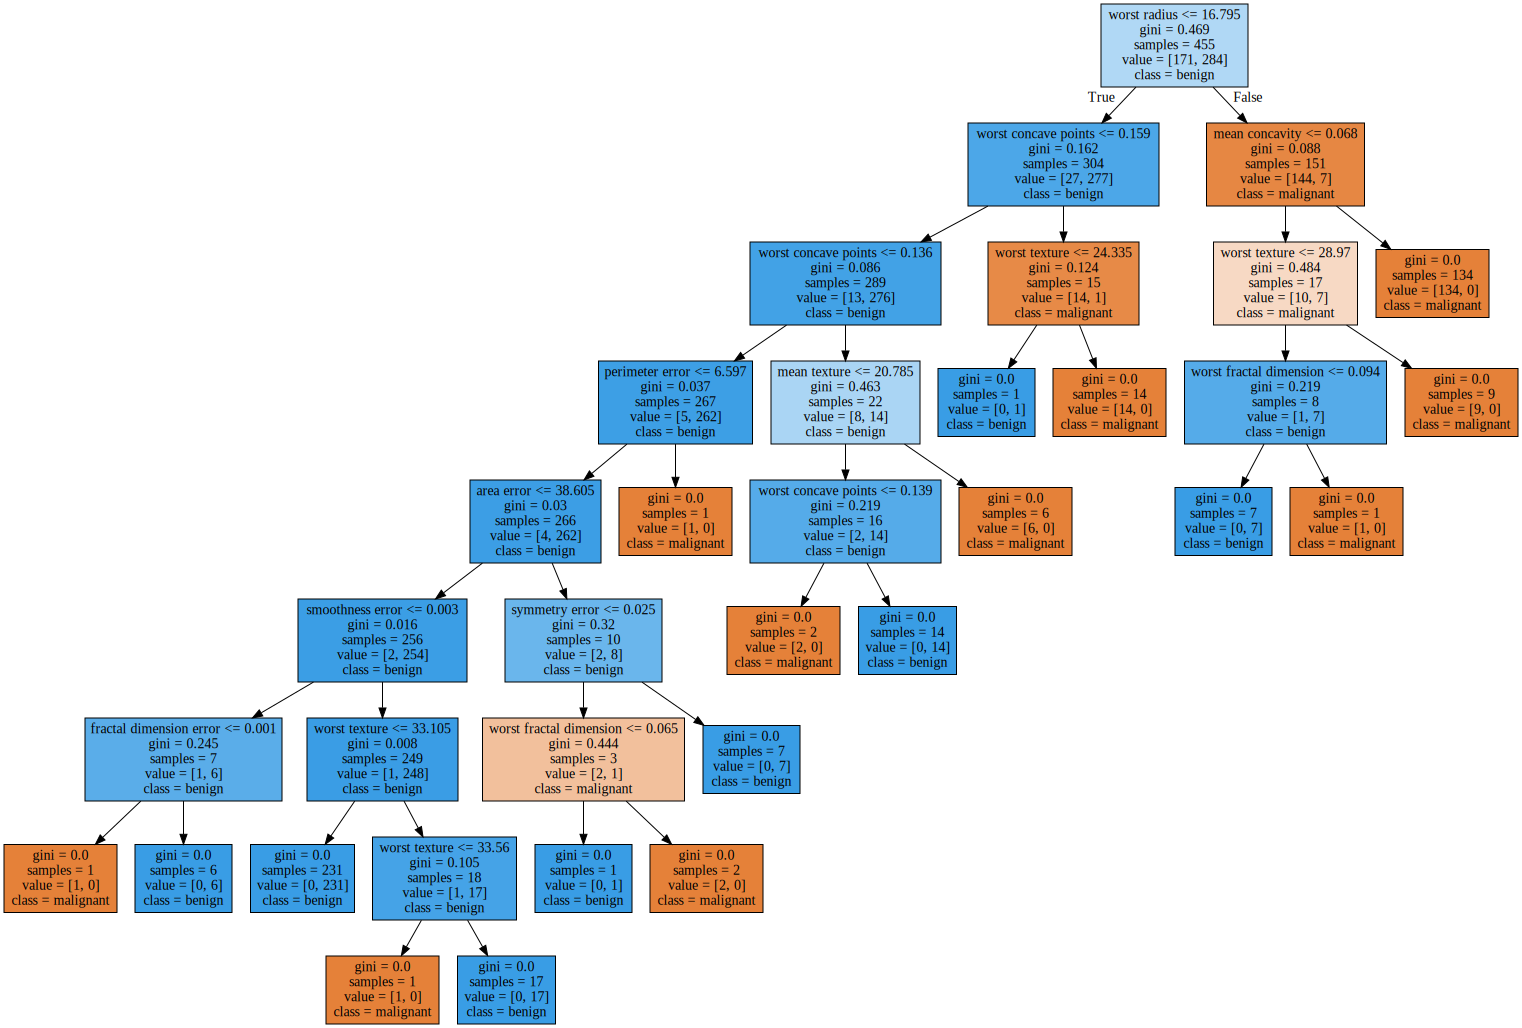

'cancer_tree.png.pdf'

In [10]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(dTree, out_file='cancer_tree.dot',
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,            
                filled = True) 

with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='cancer_tree.png')